In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img= np.array(cv2.imread("/content/drive/MyDrive/Arrow_3.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

[rows,cols]=img.shape
sobel=np.zeros(shape=(rows,cols))

for i in range(rows - 2):
    for j in range(cols - 2):
        gx = np.sum(np.multiply(Gx, img[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, img[i:i + 3, j:j + 3]))
        sobel[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)


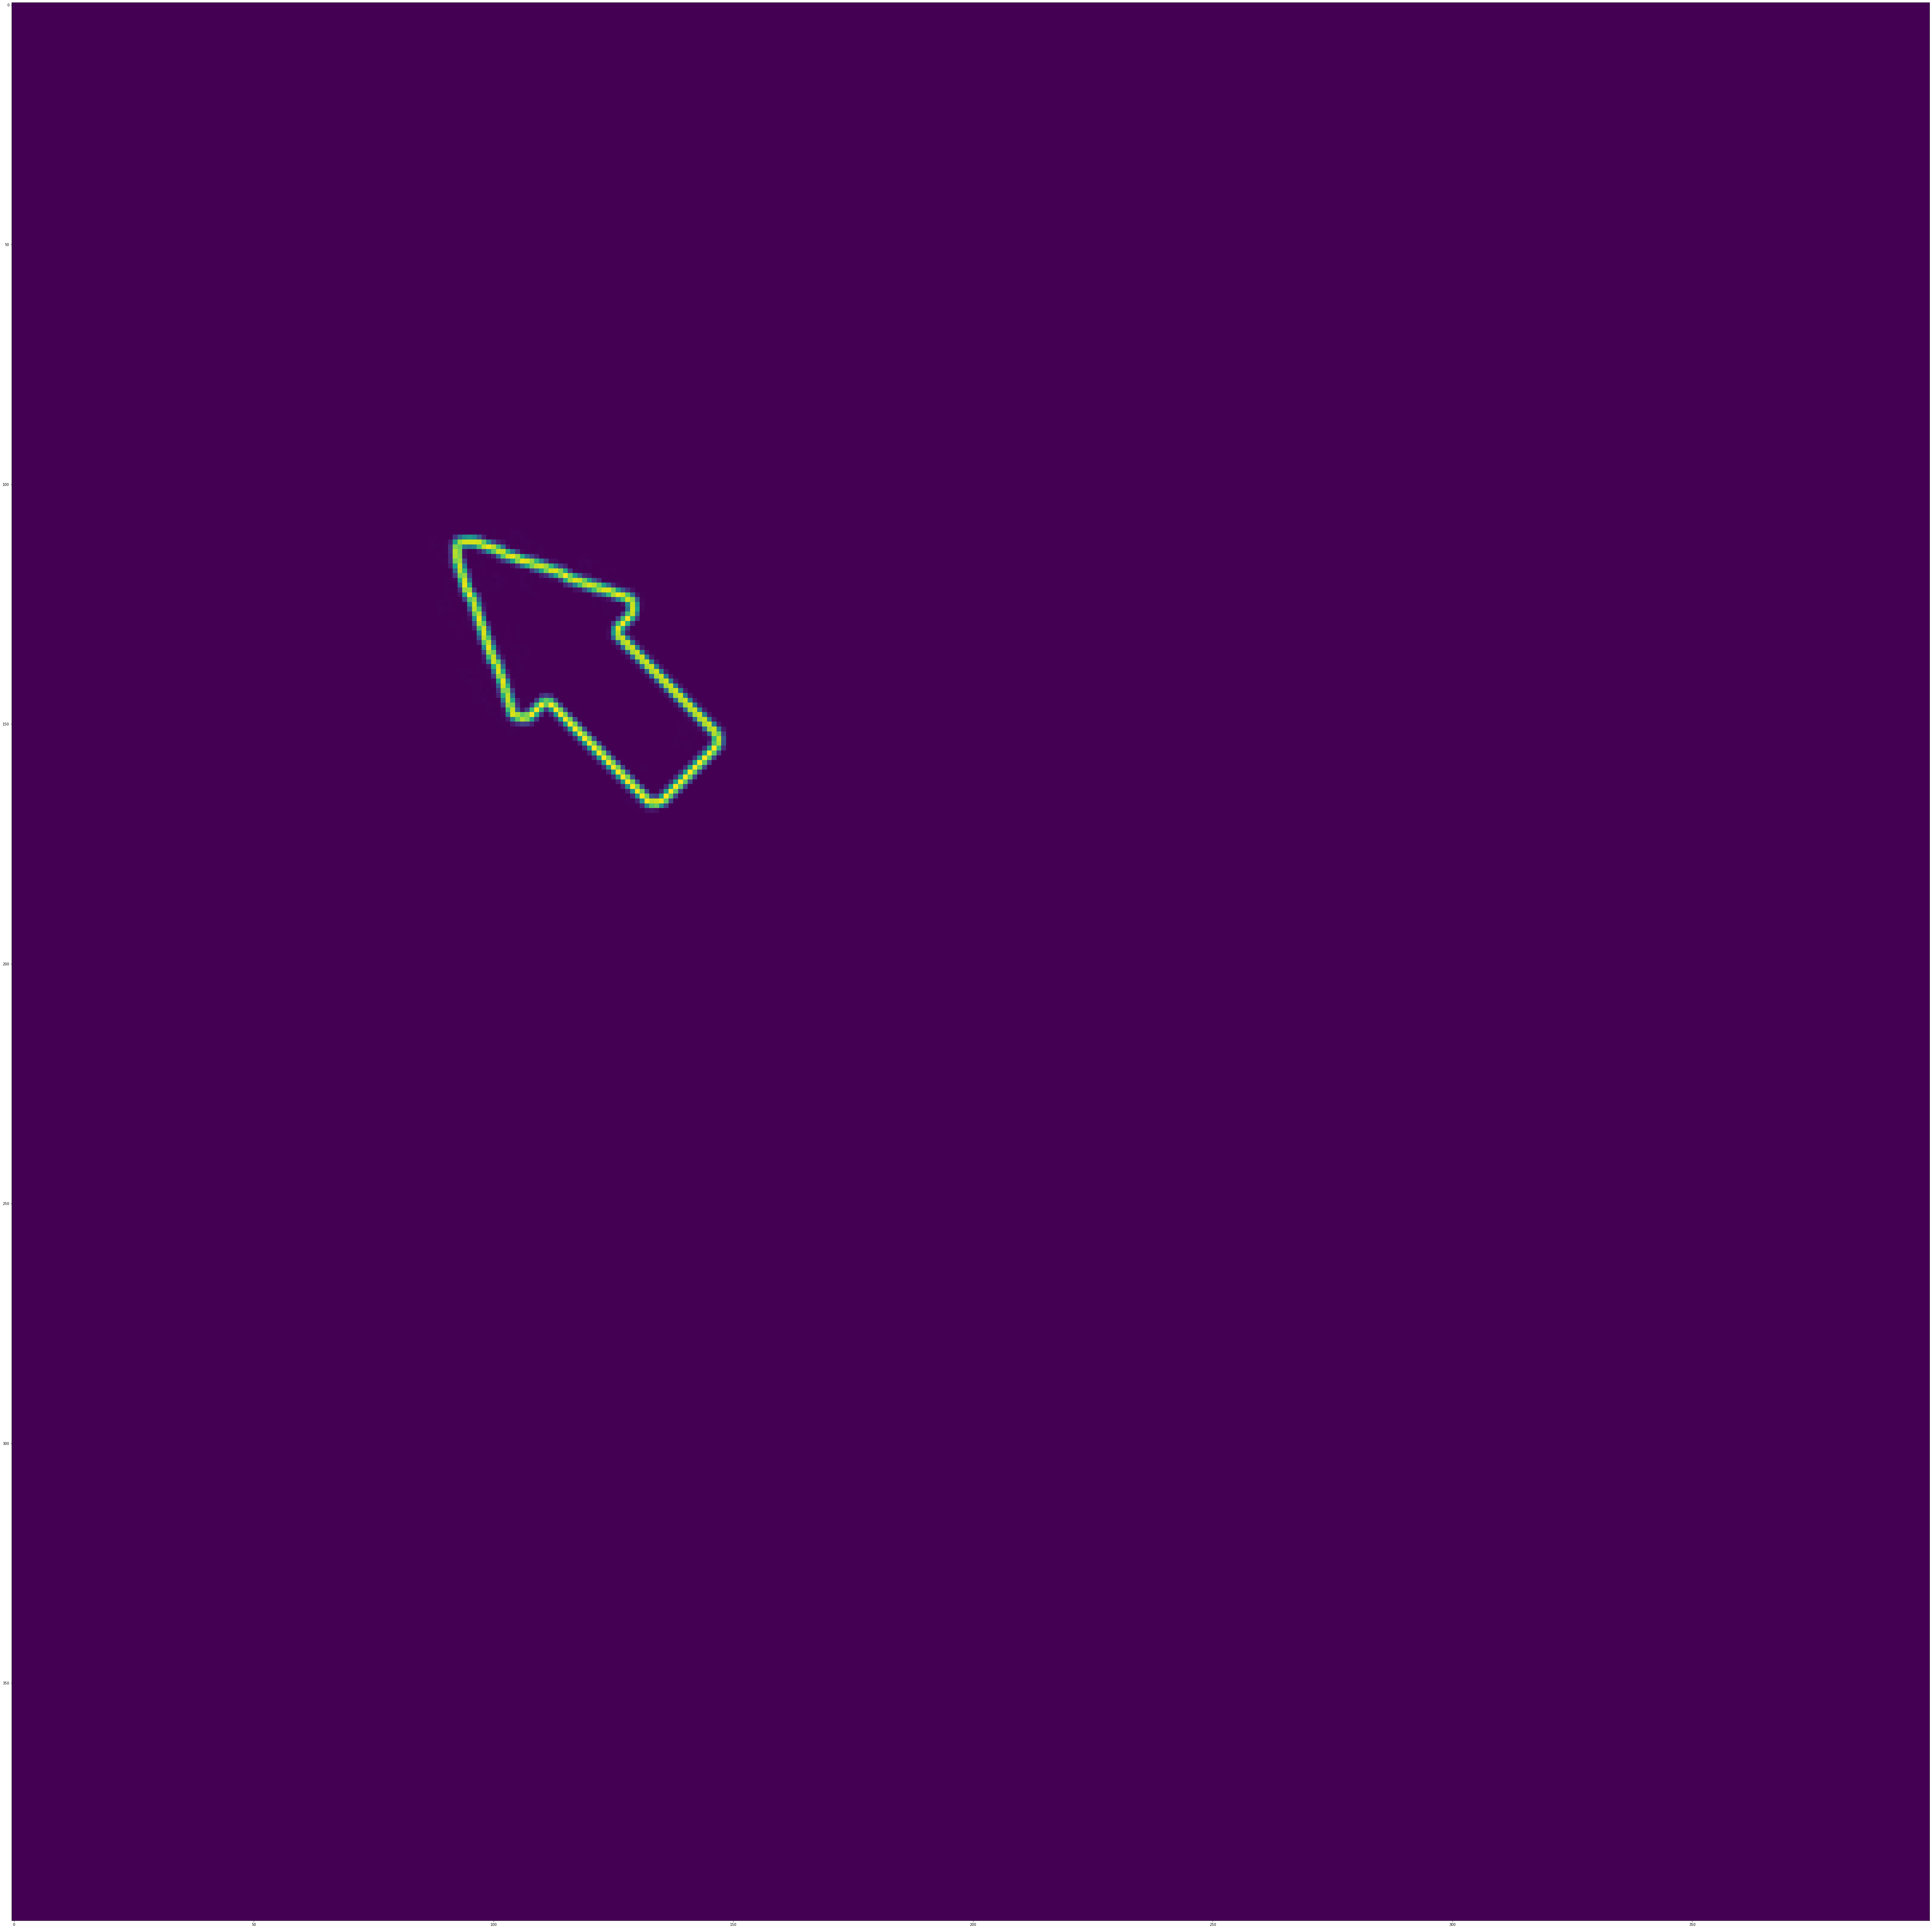

In [ ]:
plt.figure(figsize=(100,100))
plt.imshow(sobel)
plt.show()

In [ ]:
contours=[]

for i in range(rows):
  for j in range(cols):
    if(sobel[i][j]!=0):
      contours.append((j,i))

contour= np.array(contours)

In [ ]:
moment_x=0
moment_y=0

for j in range(len(contour)):
  moment_x=moment_x+contour[j][0]
  moment_y=moment_y+contour[j][1]

moment_x=moment_x/len(contour)
moment_y=moment_y/len(contour)


In [ ]:
centroids=[]

for i in range(len(img)):
  for j in range(len(img)):
    if(img[i][j]!=0):
      centroids.append((j,i))

In [ ]:
centroid= np.array(centroids)
centroid_x=0
centroid_y=0

for j in range(len(centroid)):
  centroid_x=centroid_x+centroid[j][0]
  centroid_y=centroid_y+centroid[j][1]

centroid_x=centroid_x/len(centroid)
centroid_y=centroid_y/len(centroid)

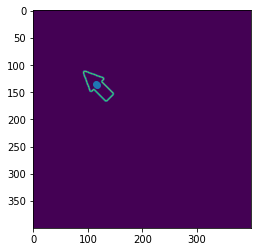

In [ ]:
X=np.array([centroid_x,moment_x])
Y=np.array([centroid_y,moment_y])
plt.scatter(X,Y)
plt.imshow(sobel)
plt.show()

In [ ]:
print(centroid_x,moment_x)
print(centroid_y,moment_y)

116.72087522176227 114.59238451935082
136.97102306327616 135.04431960049936


In [ ]:
if((moment_x>centroid_x) and abs(centroid_x-moment_x)>abs(centroid_y-moment_y)):
  print("Rightwards")
elif((centroid_x>moment_x) and abs(centroid_x-moment_x)>abs(centroid_y-moment_y)):
  print("Leftwards")
elif((centroid_y>moment_y) and abs(centroid_x-moment_x)<abs(centroid_y-moment_y)):
  print("Upwards")
elif((moment_y>centroid_y) and abs(centroid_x-moment_x)<abs(centroid_y-moment_y)):
  print("Downwards")

Leftwards
